In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
target.tail()

743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, dtype: object

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# 1. Initialize the DummyClassifier with the "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# 2. Perform 10-fold cross-validation
# This splits the data into 10 parts, training on 9 and testing on 1, ten times.
scores = cross_val_score(dummy_clf, data, target, cv=10)

# 3. Calculate the average of the 10 scores
average_accuracy = scores.mean()

print(f"Average Accuracy: {average_accuracy:.3f}")

Average Accuracy: 0.762


In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform 10-fold cross-validation with balanced_accuracy scoring
balanced_scores = cross_val_score(dummy_clf, data, target, cv=10, scoring="balanced_accuracy")

# Calculate the average
print(f"Average Balanced Accuracy: {balanced_scores.mean():.3f}")

Average Balanced Accuracy: 0.500


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Create the pipeline
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# 2. Inspect the parameters
# The name of the step for KNeighborsClassifier is usually lowercased class name 
# (e.g., 'kneighborsclassifier')
print(model.get_params()['kneighborsclassifier__n_neighbors'])

5


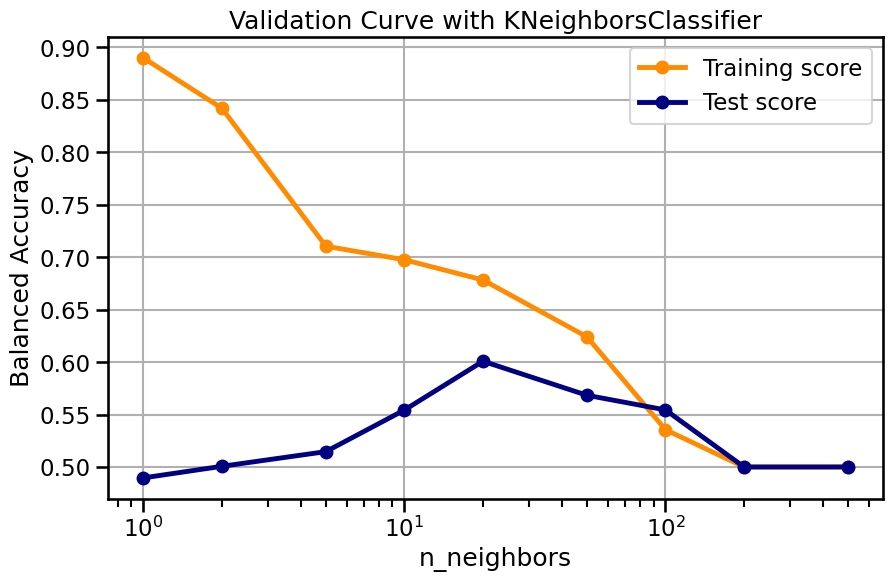

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Define the parameter range
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

# 2. Create the pipeline
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# 3. Compute the validation curve
# Note: The parameter name for the pipeline is 'kneighborsclassifier__n_neighbors'
train_scores, test_scores = validation_curve(
    model, data, target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

# 4. Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 5. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="darkorange", marker='o')
plt.plot(param_range, test_mean, label="Test score", color="navy", marker='o')

# Formatting for readability
plt.title("Validation Curve with KNeighborsClassifier")
plt.xlabel("n_neighbors")
plt.ylabel("Balanced Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.xscale('log') # Log scale helps visualize the wide range of K
plt.show()